In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [9]:
#pull the data
df = pd.read_excel('../load_data/BSP_Total.xlsx')

In [10]:
# Convert the 'datetime' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract date and time into separate columns
df['date'] = df['Date/Time'].dt.date
df['time'] = df['Date/Time'].dt.time

C:\Users\chrap\AppData\Local\Temp\ipykernel_14456\720648137.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date/Time'] = pd.to_datetime(df['Date/Time'])


In [11]:
# Drop the original 'Date/time' column if desired
df.drop(columns=['Date/Time'], inplace=True)
df = df[['date', 'time', 'Total kW','Total kVA','Total kVAr','PF']]

df.head(3)

,date,time,Total kW,Total kVA,Total kVAr,PF
0,2020-12-31,01:00:00,19310.0,20320.0,6326.634176,0.950295
1,2020-12-31,02:00:00,18510.0,19490.0,6102.458521,0.949718
2,2020-12-31,03:00:00,18040.0,19040.0,6089.334939,0.947479


{'whiskers': [<matplotlib.lines.Line2D at 0x1baf4fb8250>,
 'caps': [<matplotlib.lines.Line2D at 0x1baf4f61d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1baf5472350>],
 'medians': [<matplotlib.lines.Line2D at 0x1baf4f61390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1baf4f60950>],
 'means': []}

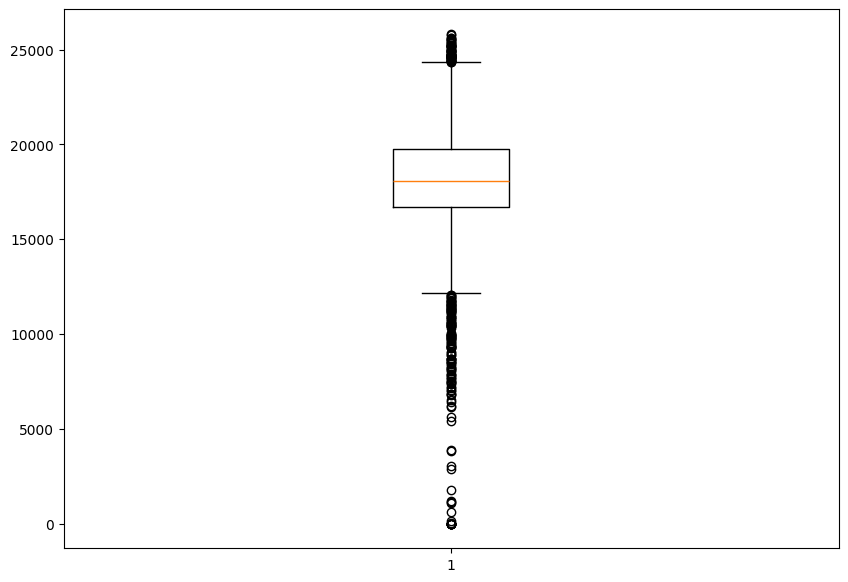

In [12]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['Total kW'])

In [ ]:
#distribution plot


In [13]:
# Calculate the IQR for the 'kW' column
Q1 = df['Total kW'].quantile(0.25)
Q3 = df['Total kW'].quantile(0.75)
IQR = Q3 - Q1
max = Q3+(1.5*IQR)

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 16696.612
Q3: 19760.97425
IQR: 3064.3622499999983


In [15]:
#find the peak outliers
rows_above_Q3 = df[df['Total kW'] > max]

print(f"Q3: {max}")
print("Rows with Power above Q3:")
print(rows_above_Q3)
print(len(rows_above_Q3))

Q3: 24357.517624999997
Rows with Power above Q3:
            date      time   Total kW  Total kVA    Total kVAr        PF
1245  2021-02-20  22:00:00  24370.000  25710.000   8191.898437  0.947880
1293  2021-02-22  22:00:00  24390.000  25680.000   8036.809068  0.949766
2348  2021-07-04  21:00:00  24633.690  29414.729  16075.061404  0.837461
2492  2021-04-13  21:00:00  24592.106  26538.861   9976.946710  0.926645
2493  2021-04-13  22:00:00  24455.433  26366.188   9854.322221  0.927530
7392  2021-04-11  01:00:00  24879.044  26594.719   9397.459675  0.935488
7652  2021-11-14  21:00:00  24416.949  32670.904  21707.154805  0.747361
7796  2021-11-20  21:00:00  24369.112  27533.658  12815.955025  0.885066
7891  2021-11-24  20:00:00  24875.083  32540.987  20979.658736  0.764423
7892  2021-11-24  21:00:00  24698.487  33045.367  21954.066140  0.747411
7915  2021-11-25  20:00:00  24529.728  34310.128  23989.108521  0.714941
7916  2021-11-25  21:00:00  24692.319  37905.860  28760.104394  0.651412
81

In [16]:
rows_above_Q3.dropna(inplace=True)
print(len(rows_above_Q3))

58


C:\Users\chrap\AppData\Local\Temp\ipykernel_14456\1557260420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_above_Q3.dropna(inplace=True)


In [17]:

#unique hour times of peaks
times = rows_above_Q3['time'].unique()
times
for time in times:
    hour = df[df['time'] == time]
    # Calculate the mean of the 'age' column
    mean = hour['Total kW'].mean()

# Calculate the standard deviation of the 'age' column
    std_dev = hour['Total kW'].std()

    # Filter the DataFrame to get rows where 'age' is greater than 30
    ages_above_30 = hour[hour['Total kW'] > (mean + (2*std_dev) )]
    tot = mean + (2*std_dev)
    print(tot )
    print(ages_above_30)

# Get the indices of these rows
    #locations = ages_above_30.index.tolist()



25928.51187452714
Empty DataFrame
Columns: [date, time, Total kW, Total kVA, Total kVAr, PF]
Index: []
26545.07498464458
Empty DataFrame
Columns: [date, time, Total kW, Total kVA, Total kVAr, PF]
Index: []
21933.112134391344
            date      time   Total kW  Total kVA   Total kVAr        PF
7392  2021-04-11  01:00:00  24879.044  26594.719  9397.459675  0.935488
25205.29815418419
            date      time   Total kW  Total kVA    Total kVAr        PF
8323  2021-12-12  20:00:00  25239.737  29410.339  15097.142652  0.858193
8467  2021-12-18  20:00:00  25369.671  27587.581  10837.638986  0.919605
24345.723899904984
            date      time   Total kW  Total kVA    Total kVAr        PF
8470  2021-12-18  23:00:00  24589.272  26468.421   9795.152513  0.929004
8590  2021-12-23  23:00:00  24449.342  27259.681  12054.869721  0.896905


In [ ]:
#list all time points
#pick one time point,find mean,std and how many were above twoXstd
#now do all